Source: 
https://irweb.irepertoire.com/nir/

Username: demo

Password: 12345

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/yhc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/21013_0_CDR3Length.csv",sep='\t',index_col=0,names="X")
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/25671_CDRs.csv",usecols=["Freq"])
data=pd.read_csv("~/Downloads/Demo_Data-Demo/21551_CDR3_list_1.csv",header=None)
data.columns=["CDR3",'Freq']
data

,CDR3,Freq
0,ATWDGLRWEYYKKL,4930
1,ATWDEGYKKL,3733
2,ATWDRRYYKKL,1946
3,ATWDSYKKL,1811
4,ALWEVQIGGYKKL,1798
5,ATWPLGKKL,1299
6,ALWEVRYKKL,1201
7,ALWEVLPTKYGKL,1173
8,ATWDGSDWIKT,1091
9,ALWEVPIKL,788


In [3]:
n=len(data) # data.shape[0]
if n>10000:
    data=data.loc[0:10000-1]
    n=len(data)
    
r=data.Freq
totalReads=sum(r)
p=r/sum(r)
-sum(p*np.log2(p))

8.01452793130937

In [4]:
totalReads50=round(totalReads/2)
totalReads50

28558

### Calculate Diversity Index
Find where 50% of total reads falls into the cumulative series

In [5]:
y = np.zeros(n+1,dtype=np.int32)
y[1]=r[0]
for i in range(2,n+1):
    y[i]=y[i-1]+r[i-1]
    if y[i-1]<totalReads50:
        if y[i]>totalReads50:
            print("found 50%! i=",i)
            DI=i*100/n
            print("DI={:.2g}".format(DI) )

found 50%! i= 25
DI=1.1


In [6]:
k=np.arange(n+1)
k

array([   0,    1,    2, ..., 2219, 2220, 2221])

In [7]:
x=k/n
x

array([0.00000000e+00, 4.50247636e-04, 9.00495272e-04, ...,
       9.99099505e-01, 9.99549752e-01, 1.00000000e+00])

In [8]:
y0 = np.zeros(n+1)
y0=k/n*sum(r)
y0

array([0.00000000e+00, 2.57167942e+01, 5.14335885e+01, ...,
       5.70655664e+04, 5.70912832e+04, 5.71170000e+04])

Text(0.5,1,'D.I.=1.1')

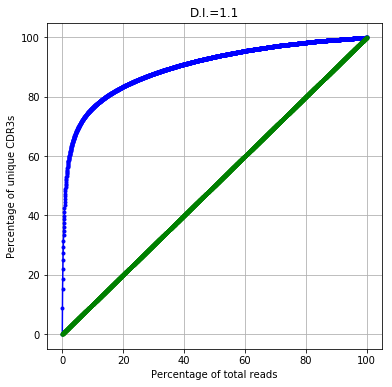

In [9]:
plt.figure(figsize=(6,6))
plt.plot(x*100,y/max(y)*100,'b.-')
plt.plot(x*100,y0/max(y0)*100,'g.--')
plt.grid(True)
plt.rc('grid', linestyle="--", color='black')
plt.xlabel("Percentage of total reads")
plt.ylabel("Percentage of unique CDR3s")
plt.title('D.I.={:.1f}'.format(DI))